# Analysing Biodiversity in National Parks in the USA

### Introduction

This project will analyse data on biodiversity in national parks (in the USA). This project aims to answer the following questions:
* How many species in the dataset are endangered?
* Are certain types of species more likely to be endangered than others?
* Is there any significant difference in the probability of one species being endangered relative to another?

After exploring these questions, this project will provide conclusions and give some insight for further research and discuss the limitations of the data and the methodologies.

### Exploring the data
First, relevant libraries which will be used for the project are imported as follows.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

The data will be loaded into dataframes to allow for analysis, done using the `.head()` method. The `observations.csv` file contains data on:
* The scientific name of each animal.
* The location in which it was observed.
* The number of times it was observed.

In [2]:
obs = pd.read_csv('observations.csv')
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The `species.csv` file contains more specific information on each species, namely:
* The `common_names` which might be of more interest to non-specialists.
* The `category`, such as mammal, reptile or amphibian.
* The `conservation_status`, i.e. whether or not the animal is under conservation.

In [3]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


Next, the overall structure of the data can be examined, by using `.info()` to glean some basic information about the data including how many missing observations we have.

**Species**

In [4]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


There are 23,296 observations, and 5,824 reported species in total. The number of unique species in the dataset can be identified:

In [5]:
species.scientific_name.nunique()

5541

Thus, there are 5,541 unique species in the dataset.
The only column with missing data is the `conservation_status` column in our `species` dataframe. This data can be assumed to be structurally missing, because for those species who are not under conservation, their conservation status need not be reported. We can verify this by checking the different entries for the `conservation_status` column as follows:

In [6]:
species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

It is clear from this output that all of these entries indicate a species is under some form of conservation. Next, the distribution of each category can be identified:

In [7]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

It is clear that the vast majority of our species are of the category `Vascular Plant`. This is interesting to note and may provide some direction for analysis later on.

**Observations**

In [8]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


Sorting the data to see which animals have been observed the most:

In [9]:
obs.sort_values(by=['observations'], ascending=False)

,scientific_name,park_name,observations
11281,Lycopodium tristachyum,Yellowstone National Park,321
1168,Castilleja miniata,Yellowstone National Park,317
20734,Cryptantha fendleri,Yellowstone National Park,316
8749,Dracocephalum parviflorum,Yellowstone National Park,316
7112,Bidens tripartita,Yellowstone National Park,314
...,...,...,...
20375,Sambucus mexicana,Great Smoky Mountains National Park,12
18823,Rana sierrae,Great Smoky Mountains National Park,11
16054,Strix occidentalis,Great Smoky Mountains National Park,11
15511,Collomia tinctoria,Great Smoky Mountains National Park,10


And how many observations have been taken during the collection of this dataset:

In [10]:
obs.observations.sum()

3314739

3.3 Million!

### Analysis

Next, each question laid out in the introduction will be answered in turn, starting with the first:

**Question One:**
* How many species in the dataset are endangered?

In [11]:
species[species.conservation_status == 'Endangered'].count()

category               16
scientific_name        16
common_names           16
conservation_status    16
dtype: int64

There are 16 endangered species in the dataset. They are as follows:

In [12]:
endangered_species = species[species.conservation_status == 'Endangered']
endangered_species.reset_index(drop=True, inplace=True)
endangered_species

,category,scientific_name,common_names,conservation_status
0,Mammal,Canis lupus,Gray Wolf,Endangered
1,Mammal,Canis rufus,Red Wolf,Endangered
2,Mammal,Myotis grisescens,Gray Myotis,Endangered
3,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
4,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
5,Bird,Grus americana,Whooping Crane,Endangered
6,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
7,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
8,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
9,Fish,Noturus baileyi,Smoky Madtom,Endangered


Which category has the most endangered species? This can be computed by grouping the data by `category` as follows:

In [13]:
endangered_categories = endangered_species.groupby('category').scientific_name.count()
endangered_categories.sort_values(ascending=False)
endangered_categories = pd.DataFrame(endangered_categories)
endangered_categories.reset_index(inplace=True)
endangered_categories.rename(columns={'scientific_name': 'count'}, inplace=True)
endangered_categories

,category,count
0,Amphibian,1
1,Bird,4
2,Fish,3
3,Mammal,7
4,Vascular Plant,1


Mammals are the most commonly endangered species, follwed by birds, fish, amphibians and vascular plants. To visualise these figures, use Seaborn's `countplot` function to create a bar chart:

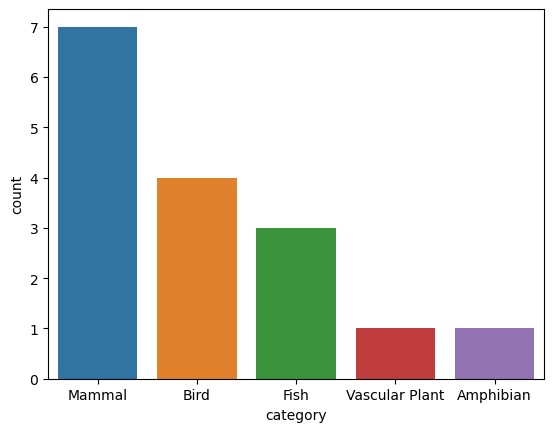

<Figure size 640x480 with 0 Axes>

In [14]:
sns.countplot(data=endangered_species, x='category')
plt.savefig('endangered.png')
plt.show()
plt.clf()

Of all the categories of observation, mammals are the most likely to be endangered, with 7 species of mammal being endangered.

**Question Two:**

* Are certain types of species more likely to be endangered than others?
The difference between the two is subtle, but this question essentially seeks to find which category has the greatest proportion of endangered species. While mammals may have the largest number of endangered species, is this due to the fact there are a disproportionately large number of mammals observed in the dataset?

Recall from previous exploratory analysis that the number of observations belonging to each category is as follows:

In [15]:
num_obs = species.groupby('category').size().sort_values(ascending=False)
num_obs = pd.DataFrame(num_obs)
num_obs.reset_index(inplace=True)
num_obs.columns = ['category', 'count']
num_obs

,category,count
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


Sorting this data allows for easier comparison and visualisation.

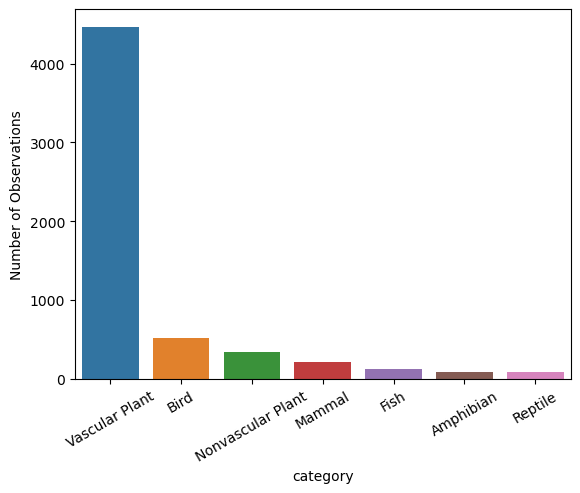

<Figure size 640x480 with 0 Axes>

In [16]:
sns.countplot(data=species, x='category', order=num_obs.category)
plt.ylabel('Number of Observations')
plt.xticks(rotation=30)
plt.show()
plt.clf()

While this does plot the data, it is clear that the overwhelming majority of species belonging to the `Vascular Plant` category make the visualisation difficult to interpret. This can be avoided by viewing the plot with just the other categories:

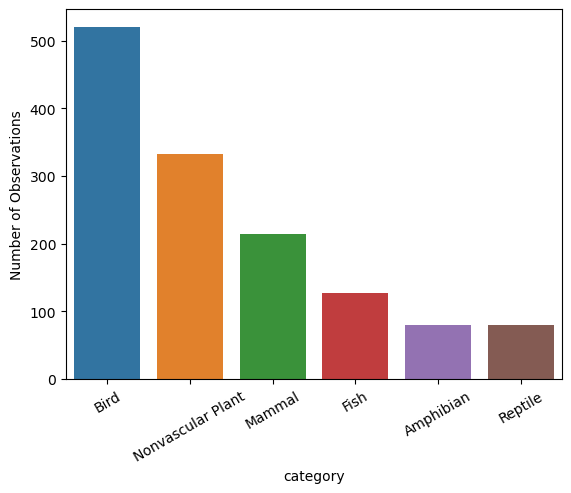

<Figure size 640x480 with 0 Axes>

In [17]:
sns.countplot(data=species, x='category', order=num_obs.category[1:])
plt.ylabel('Number of Observations')
plt.xticks(rotation=30)
plt.show()
plt.clf()

The aim here is to work out the proportion of endangered species relative to their category, to determine the category for which a species is most likely to be endangered. A separate dataframe containing the proportion of endangered species will be created to visualise this.

In [18]:
merged = pd.merge(endangered_categories, num_obs, on='category', how='inner')
merged.columns = ['category', 'num_endangered', 'total_obs']
merged['prop_endangered'] = merged.apply(lambda row: 100 * (row.num_endangered / row.total_obs), axis=1)
merged.sort_values(by='prop_endangered', ascending=False, inplace=True)
merged_neat = merged.drop(columns=['num_endangered', 'total_obs'])
merged_neat

,category,prop_endangered
3,Mammal,3.271028
2,Fish,2.362205
0,Amphibian,1.250000
1,Bird,0.767754
4,Vascular Plant,0.022371


As it turns out, mammals are also the most liklely to be endangered, with 3.27% of all mammals observed being endangered!

**Question three:**
* Is there any significant difference in the probability of one species being endangered relative to another?

In [19]:
from scipy.stats import chi2_contingency

merged['not_endangered'] = merged.apply(lambda row: row.total_obs - row.num_endangered, axis=1)

for i in range(len(merged)):
    for j in range(i + 1, len(merged)):
        contingency_table = merged[['num_endangered', 'not_endangered']].iloc[[i, j]]
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        print(f"p-value for {merged['category'].iloc[i]} and {merged['category'].iloc[j]}:", p_value)

p-value for Mammal and Fish: 0.8815997515880336
p-value for Mammal and Amphibian: 0.5856237376052693
p-value for Mammal and Bird: 0.027458824119305284
p-value for Mammal and Vascular Plant: 2.5886137410747274e-25
p-value for Fish and Amphibian: 0.9620457785370382
p-value for Fish and Bird: 0.2801617062109982
p-value for Fish and Vascular Plant: 3.0398003234778873e-13
p-value for Amphibian and Bird: 1.0
p-value for Amphibian and Vascular Plant: 0.012368537770463622
p-value for Bird and Vascular Plant: 1.312931856470747e-05


This output may seem overwhelming, but the p-value reported simply tells us whether the difference in probability of one category being endangered relative to another is significant. Whether or not the difference is significant depends on the threshold, but normally a threshold of 5% is used. 

If the p-value is less than 0.05, the difference is statistically significant. If the value is more than 0.05, the difference is not statistically significant. 

Statistical significance means that, formally, one cannot reject the null hypothesis that the difference between the probability of species in the two categories being endangered is zero. In more understandable terms, it means the difference is too close to zero to be considered different at all.

This output can be made easier to understand by only reporting p-values less than 0.05.

In [20]:
for i in range(len(merged)):
    for j in range(i + 1, len(merged)):
        contingency_table = merged[['num_endangered', 'not_endangered']].iloc[[i, j]]
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        if p_value < 0.05:
            print((f'the difference in endangered status rates between a {merged["category"].iloc[i]} and a {merged["category"].iloc[j]} is significant (p-value = {p_value.round(2)})\n'))
        else:
            pass

the difference in endangered status rates between a Mammal and a Bird is significant (p-value = 0.03)

the difference in endangered status rates between a Mammal and a Vascular Plant is significant (p-value = 0.0)

the difference in endangered status rates between a Fish and a Vascular Plant is significant (p-value = 0.0)

the difference in endangered status rates between a Amphibian and a Vascular Plant is significant (p-value = 0.01)

the difference in endangered status rates between a Bird and a Vascular Plant is significant (p-value = 0.0)



The significant differences in conservation statuses:
* Occur primarily between Vascular Plants and the other categories, which could be expected seeing as the proportion of Vascular plants which are endangered is much lower than the other categories.


* There is also a significant difference between Mammals and Birds, the groups with the highest and second lowest proportion of endangered species respectively.

### Conclusion

Now that the analysis portion has been conducted, the project will reassess the questions asked and summarise the findings:

**How many species in the dataset are endangered?**
* *__There were 16 endangered species in the dataset__*, comprising of 7 mammals, 4 birds, 3 fish, 1 amphibian and 1 vascular plant.
* There were no reptiles or non-vascular plants which were endangered in the dataset.

**Are certain types of species more likely to be endangered than others?**
* This question was answered by comparing the proportion of species belonging to each category which were endangered.
* The analysis found that *__mammals were the most likely to be endangered__*, with 3.27% being endangered, followed by fish, amphibians, birds and vascular plants.

**Is there any significant difference in the probability of one species being endangered relative to another?**
* This question sought to determine whether the difference in probability of one category being endangered was significantly different among categories.
* For categories where the difference is found to be significant, it can be concluded that the chance of a species belonging to this category being endangered is different to the chance of a species belonging to another category being endangered.
* The analysis showed that *__the probability of vascular plants being endangered was significantly lower than the probability of mammals, fish, amphibians and birds. It also found the probability of mammals being endangered was significantly different to the probability of birds being endangered.__*

### Further Research

Further research may look to analyse data on a larger geographical basis: the dataset used for this project contained only 4 national parks, all in the USA. By incorporating data from a larger range of locations, analysis could seek to discern whether the prevalence of endangered species changes with location, and what kinds of species tend to be more common in different locations.